# **Experiment - 4 (Model model)**

# Data ingestion

In [ ]:
import pandas as pd

# Loading dataset
data = pd.read_csv("/content/drive/MyDrive/NLP project dataset/deceptive-opinion.csv")

# Droping unnecessary columns
data.drop(columns=['hotel', 'source'], inplace=True)

data.head()


,deceptive,polarity,text
0,truthful,positive,We stayed for a one night getaway with family ...
1,truthful,positive,Triple A rate with upgrade to view room was le...
2,truthful,positive,This comes a little late as I'm finally catchi...
3,truthful,positive,The Omni Chicago really delivers on all fronts...
4,truthful,positive,I asked for a high floor away from the elevato...


Importing some libraries

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Data Pre-processing

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)
data.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,deceptive,polarity,text,cleaned_text
0,truthful,positive,We stayed for a one night getaway with family ...,stayed one night getaway family thursday tripl...
1,truthful,positive,Triple A rate with upgrade to view room was le...,triple rate upgrade view room less also includ...
2,truthful,positive,This comes a little late as I'm finally catchi...,come little late im finally catching review pa...
3,truthful,positive,The Omni Chicago really delivers on all fronts...,omni chicago really delivers front spaciousnes...
4,truthful,positive,I asked for a high floor away from the elevato...,asked high floor away elevator got room pleasa...


# Feature Engineering(TF-IDF vectorization) for logistic regression model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()


,aaa,ability,able,absolute,absolutely,ac,accent,accept,acceptable,accepted,...,youd,youll,young,younger,youre,youve,yuck,yummy,zest,zone
0,0.217436,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.087585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.190926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Encoding the target column

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['deceptive_encoded'] = label_encoder.fit_transform(data['deceptive'])

data.head()


,deceptive,polarity,text,cleaned_text,deceptive_encoded
0,truthful,positive,We stayed for a one night getaway with family ...,stayed one night getaway family thursday tripl...,1
1,truthful,positive,Triple A rate with upgrade to view room was le...,triple rate upgrade view room less also includ...,1
2,truthful,positive,This comes a little late as I'm finally catchi...,come little late im finally catching review pa...,1
3,truthful,positive,The Omni Chicago really delivers on all fronts...,omni chicago really delivers front spaciousnes...,1
4,truthful,positive,I asked for a high floor away from the elevato...,asked high floor away elevator got room pleasa...,1


# Train-Valid-Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    tfidf_df,
    data['deceptive_encoded'],
    test_size=0.3,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)



Data split successful!


# Model Training using basic logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.8916666666666667
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       122
           1       0.88      0.91      0.89       118

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



In [ ]:
from sklearn.model_selection import train_test_split


X = data['cleaned_text']
y = data['deceptive_encoded']

# Split into training and temporary sets (80% train, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the temporary set into validation and test sets (10% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the sizes of each split
print(f"Training Set: {len(X_train)} samples")
print(f"Validation Set: {len(X_val)} samples")
print(f"Test Set: {len(X_test)} samples")


Training Set: 1280 samples
Validation Set: 160 samples
Test Set: 160 samples


# Tokenization

In [ ]:
from transformers import AutoTokenizer

# Load the DistilBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the text data
def tokenize_data(texts):
    return tokenizer(
        list(texts),
        padding=True,        # Pad to the longest sequence
        truncation=True,     # Truncate sequences longer than the model's max length
        max_length=512,      # Max token length for DistilBERT
        return_tensors="pt"  # Return PyTorch tensors
    )

# Tokenize the train, validation, and test sets
train_encodings = tokenize_data(X_train)
val_encodings = tokenize_data(X_val)
test_encodings = tokenize_data(X_test)

# Display sample tokenized data for verification
print("Sample tokenized input IDs:", train_encodings['input_ids'][0])
print("Sample tokenized attention mask:", train_encodings['attention_mask'][0])


Sample tokenized input IDs: tensor([  101,  2821, 15003,  2288,  2028,  5409,  2173,  2994,  5116,  3190,
         2253,  2092,  2438,  9361,  2253, 19448,  2172,  2187,  9059,  5221,
         3291,  4121, 10722,  4103, 11848,  4845,  3984, 10850,  2738,  5697,
         2154,  2165,  3338,  9471,  2123,  2102,  2113,  3976,  3715,  2828,
         2518, 21873,  2673,  2842,  5025,  2282,  3517,  5005,  2978, 10047,
         2109,  2295,  4680,  2267,  2287,  4845,  6595,  2723,  1057,  2356,
         2333,  2178,  2282,  2131,  1057,  2178,  2282,  2165,  3053,  3178,
         2117,  2282,  2499,  2092,  1057,  2180,  2102, 26875,  6595,  4606,
         4770,  2800,  2428,  4299,  2052,  3855,  4037,  2559,  2830,  2154,
         3376,  2173,  6919,  3295,  2342,  2147,  8013,  2326,  5665, 28667,
         5644, 18688,  6595,  2188,  3702,  7621, 15481,  3190,  5116,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 

# Converting labels to pytorch tensors

In [ ]:
import torch


train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)
test_labels = torch.tensor(y_test.values)

print("Training Labels Shape:", train_labels.shape)
print("Validation Labels Shape:", val_labels.shape)
print("Test Labels Shape:", test_labels.shape)


Training Labels Shape: torch.Size([1280])
Validation Labels Shape: torch.Size([160])
Test Labels Shape: torch.Size([160])


# Model Loding Pretrained distlBERT

In [ ]:
from transformers import AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader


model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)


class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }

train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)
test_dataset = TextDataset(test_encodings, test_labels)

sample = train_dataset[0]
print("Sample Input IDs:", sample['input_ids'])
print("Sample Attention Mask:", sample['attention_mask'])
print("Sample Label:", sample['labels'])


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sample Input IDs: tensor([  101,  2821, 15003,  2288,  2028,  5409,  2173,  2994,  5116,  3190,
         2253,  2092,  2438,  9361,  2253, 19448,  2172,  2187,  9059,  5221,
         3291,  4121, 10722,  4103, 11848,  4845,  3984, 10850,  2738,  5697,
         2154,  2165,  3338,  9471,  2123,  2102,  2113,  3976,  3715,  2828,
         2518, 21873,  2673,  2842,  5025,  2282,  3517,  5005,  2978, 10047,
         2109,  2295,  4680,  2267,  2287,  4845,  6595,  2723,  1057,  2356,
         2333,  2178,  2282,  2131,  1057,  2178,  2282,  2165,  3053,  3178,
         2117,  2282,  2499,  2092,  1057,  2180,  2102, 26875,  6595,  4606,
         4770,  2800,  2428,  4299,  2052,  3855,  4037,  2559,  2830,  2154,
         3376,  2173,  6919,  3295,  2342,  2147,  8013,  2326,  5665, 28667,
         5644, 18688,  6595,  2188,  3702,  7621, 15481,  3190,  5116,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    

# MODEL TRAINING - setting up the optimizer, scheduler and traing loop

In [ ]:
from transformers import AdamW
from transformers import get_scheduler
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Define hyperparameters
batch_size = 16
learning_rate = 5e-5
epochs = 3

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

optimizer = AdamW(model.parameters(), lr=learning_rate)

num_training_steps = epochs * len(train_loader)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

def train_model():
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc="Training"):

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Training Loss: {avg_loss:.4f}")
    return avg_loss

def evaluate_model():
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()


            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total
    print(f"Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    return avg_loss, accuracy

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    train_loss = train_model()
    val_loss, val_accuracy = evaluate_model()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/3


Training: 100%|██████████| 80/80 [00:54<00:00,  1.47it/s]


Training Loss: 0.5951


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.22it/s]


Validation Loss: 0.5107, Accuracy: 0.7562

Epoch 2/3


Training: 100%|██████████| 80/80 [00:51<00:00,  1.55it/s]


Training Loss: 0.3180


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.37it/s]


Validation Loss: 0.2908, Accuracy: 0.8875

Epoch 3/3


Training: 100%|██████████| 80/80 [00:52<00:00,  1.54it/s]


Training Loss: 0.1526


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.41it/s]

Validation Loss: 0.2979, Accuracy: 0.8812


# Model evaluation test set

In [ ]:

test_loader = DataLoader(test_dataset, batch_size=batch_size)

def evaluate_test_set():
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total
    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    return avg_loss, accuracy

test_loss, test_accuracy = evaluate_test_set()
print(f"Final Test Set Evaluation - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")


Testing: 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]

Test Loss: 0.2433, Accuracy: 0.9187
Final Test Set Evaluation - Loss: 0.2433, Accuracy: 0.9187


# Model evaluation test set- classification report, confusion matrix

Evaluating: 100%|██████████| 10/10 [00:01<00:00,  7.56it/s]


Classification Report:
              precision    recall  f1-score   support

    Truthful       0.91      0.93      0.92        80
   Deceptive       0.92      0.91      0.92        80

    accuracy                           0.92       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.92      0.92      0.92       160



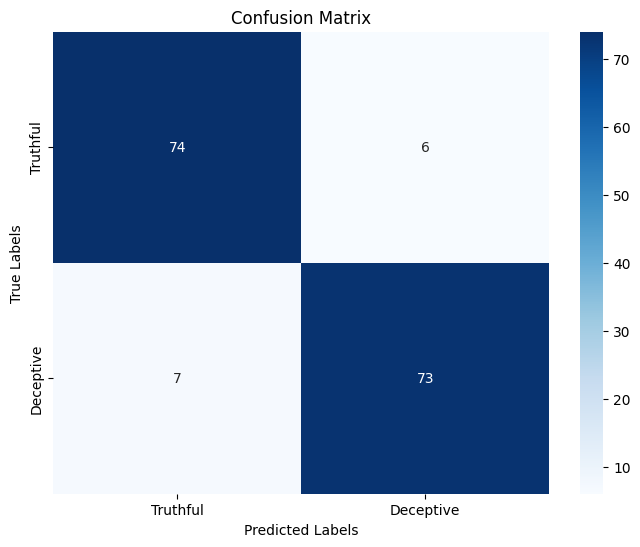

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def evaluate_with_metrics():
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    conf_matrix = confusion_matrix(all_labels, all_preds)

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=["Truthful", "Deceptive"]))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Truthful", "Deceptive"], yticklabels=["Truthful", "Deceptive"])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_with_metrics()
